# 🌲 Random Forest vs 💥 XGBoost Model Comparison

In this notebook, we compare the performance of:
- Random Forest (RF)
- XGBoost (XGB)

Each model was trained per drug using 5-fold cross-validation.  
Metrics: **RMSE** and **R²**, evaluated across folds.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

NUM_PCS = 20

# Load summaries
rf = pd.read_csv(f"rf/results/model_performance_summary_{NUM_PCS}_pcs.csv").assign(Model="RandomForest")
xgb = pd.read_csv(f"xgb/results/model_performance_summary_{NUM_PCS}_pcs.csv").assign(Model="XGBoost")

# Combine
complex_df = pd.concat([rf, xgb], ignore_index=True)

# Clean names if needed
complex_df.rename(columns=lambda c: c.replace("²", "^2").strip(), inplace=True)

print("✅ Combined shape:", complex_df.shape)
complex_df.head()


✅ Combined shape: (1242, 7)


,DRUG_ID,n_samples,rmse_mean,rmse_std,r2_mean,r2_std,Model
0,1,391,1.139835,0.191064,-0.091479,0.167996,RandomForest
1,3,356,2.005319,0.211948,-0.021388,0.068905,RandomForest
2,5,394,1.498939,0.070048,0.168901,0.047086,RandomForest
3,6,403,0.920702,0.098295,-0.082390,0.063050,RandomForest
4,9,396,1.401261,0.146641,0.069644,0.083584,RandomForest


In [5]:
filtered_complex_df = complex_df[
    (complex_df["rmse_mean"] <= 3.5) &
    (complex_df["r2_mean"] >= -1)
].copy()

print(f"🧼 Filtered shape: {filtered_complex_df.shape}")


🧼 Filtered shape: (1242, 7)


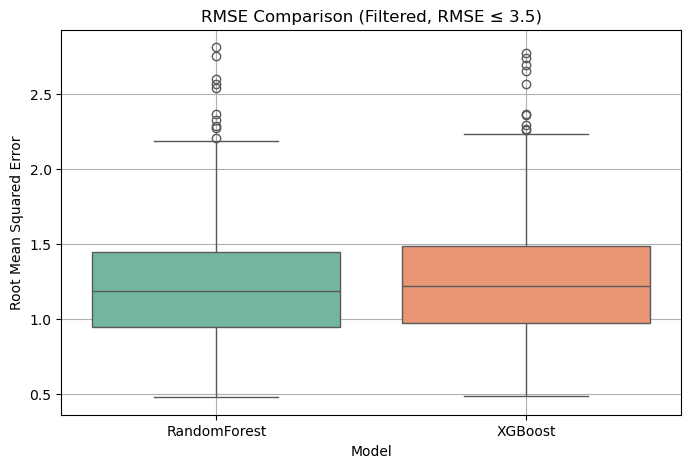

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_complex_df, x="Model", y="rmse_mean", hue="Model", legend=False, palette="Set2")
plt.title("RMSE Comparison (Filtered, RMSE ≤ 3.5)")
plt.ylabel("Root Mean Squared Error")
plt.grid(True)
plt.show()


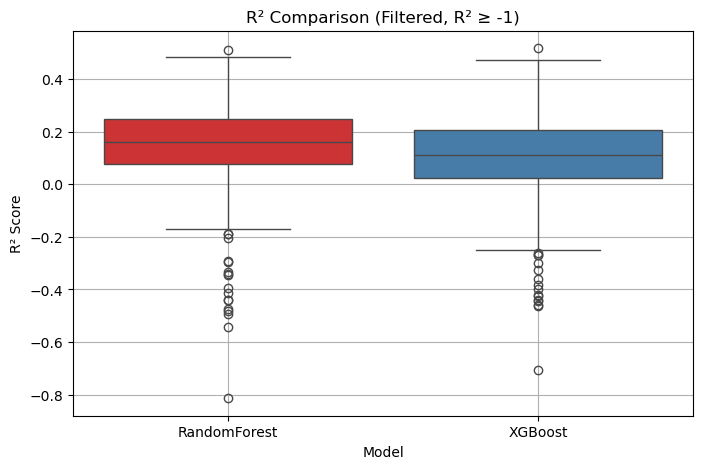

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_complex_df, x="Model", y="r2_mean", hue="Model", legend=False, palette="Set1")
plt.title("R² Comparison (Filtered, R² ≥ -1)")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()


### 📌 Summary Statistics (Complex Models)


In [8]:
filtered_complex_df.groupby("Model")[["rmse_mean", "r2_mean"]].agg(["mean", "std", "median"]).round(4)


rmse_mean                 r2_mean                
                  mean     std  median    mean     std  median
Model                                                         
RandomForest    1.2305  0.3751  1.1842  0.1510  0.1455  0.1605
XGBoost         1.2609  0.3816  1.2207  0.1067  0.1485  0.1110